In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

df=pd.read_csv("C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\Cleaned_HR_Analytics.csv")

categorical_vars = [
    'OverTime',
    'BusinessTravel',
    'JobRole',
    'MaritalStatus',
    'EducationField',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
    'Gender',
    'StockOptionLevel'
]

def chi_square_test(df,column,target='Attrition'):
    table=pd.crosstab(df[column],df[target])
    chi2,p,dof,expected=chi2_contingency(table)
    print(f"\n Chi-Square Test: {column} vs {target}")
    print("-"*40)
    print("Contingency Table:\n",table)
    print("\nChi-square Statistics:",round(chi2,2))
    print("P-value:",round(p,4))
    print("Degrees of Freedom:",dof)
    if p<0.05:
        print(f"\n Conclusion: {column} and {target} are significantly associated (p<0.05)")
    else:
        print(f"\n Conclusion: {column} and {target} are independent (no relationship, p>=0.0.5)")

for col in categorical_vars:
    chi_square_test(df,col)


 Chi-Square Test: OverTime vs Attrition
----------------------------------------
Contingency Table:
 Attrition   No  Yes
OverTime           
No         952  110
Yes        290  128

Chi-square Statistics: 89.77
P-value: 0.0
Degrees of Freedom: 1

 Conclusion: OverTime and Attrition are significantly associated (p<0.05)

 Chi-Square Test: BusinessTravel vs Attrition
----------------------------------------
Contingency Table:
 Attrition           No  Yes
BusinessTravel             
Non-Travel         139   12
TravelRarely         8    0
Travel_Frequently  210   69
Travel_Rarely      885  157

Chi-square Statistics: 25.2
P-value: 0.0
Degrees of Freedom: 3

 Conclusion: BusinessTravel and Attrition are significantly associated (p<0.05)

 Chi-Square Test: JobRole vs Attrition
----------------------------------------
Contingency Table:
 Attrition                   No  Yes
JobRole                            
Healthcare Representative  123    9
Human Resources             40   12
Laboratory T

## 🔍 Chi-Square Test Results: Categorical Variables vs Attrition

The Chi-Square test checks whether there is a statistically significant relationship between categorical features and employee attrition.

### ✅ Variables with Significant Association (p < 0.05)
These variables have a strong relationship with attrition — they may influence employees leaving:

- **OverTime**
- **BusinessTravel**
- **JobRole**
- **MaritalStatus**
- **EducationField**
- **EnvironmentSatisfaction**
- **WorkLifeBalance**
- **StockOptionLevel**

### ❌ Variables with No Significant Association (p ≥ 0.05)
These variables show no clear statistical relationship with attrition:

- **JobSatisfaction**
- **Gender**

### 🔎 Insights:
- Employees working **OverTime** or in **frequent travel roles** are more likely to leave.
- **Single** employees and those with **low environment satisfaction** also show higher attrition.
- Surprisingly, **JobSatisfaction** and **Gender** show no strong link with attrition in this dataset.

This analysis helps prioritize key factors to investigate further or use in predictive models.


In [27]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv("C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\Cleaned_HR_Analytics.csv")  # Update with your path

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

numerical_cols = df.select_dtypes(include='number').columns.drop('Attrition')

print("T-test Results for Numerical Variables vs Attrition\n")

for col in numerical_cols:
    group_yes = df[df['Attrition'] == 1][col].dropna()
    group_no = df[df['Attrition'] == 0][col].dropna()

    if group_yes.empty or group_no.empty:
        print(f"⚠️ Skipping {col}: one of the groups is empty.\n")
        continue
    if group_yes.std() < 1e-6 and group_no.std() < 1e-6:
        print(f"⚠️ Skipping {col}: data too similar in both groups.\n")
        continue

    stat, p = ttest_ind(group_yes, group_no, equal_var=False)

    print(f"📊 Variable: {col}")
    print(f"   - Mean (Left): {group_yes.mean():.2f}")
    print(f"   - Mean (Stayed): {group_no.mean():.2f}")
    print(f"   - P-Value: {p:.4f}")

    if p < 0.05:
        print("   ✅ Significant difference (p < 0.05)\n")
    else:
        print("   ❌ No significant difference (p ≥ 0.05)\n")
 

T-test Results for Numerical Variables vs Attrition

📊 Variable: Age
   - Mean (Left): 33.68
   - Mean (Stayed): 37.54
   - P-Value: 0.0000
   ✅ Significant difference (p < 0.05)

📊 Variable: DailyRate
   - Mean (Left): 748.93
   - Mean (Stayed): 811.44
   - P-Value: 0.0286
   ✅ Significant difference (p < 0.05)

📊 Variable: DistanceFromHome
   - Mean (Left): 10.71
   - Mean (Stayed): 8.94
   - P-Value: 0.0032
   ✅ Significant difference (p < 0.05)

📊 Variable: Education
   - Mean (Left): 2.84
   - Mean (Stayed): 2.92
   - P-Value: 0.2406
   ❌ No significant difference (p ≥ 0.05)

⚠️ Skipping EmployeeCount: data too similar in both groups.

📊 Variable: EmployeeNumber
   - Mean (Left): 1014.74
   - Mean (Stayed): 1035.14
   - P-Value: 0.6240
   ❌ No significant difference (p ≥ 0.05)

📊 Variable: EnvironmentSatisfaction
   - Mean (Left): 2.47
   - Mean (Stayed): 2.77
   - P-Value: 0.0003
   ✅ Significant difference (p < 0.05)

📊 Variable: HourlyRate
   - Mean (Left): 65.46
   - Mean (Sta

# 📊 T-Test Summary: Numerical Variables vs Attrition

The t-test compares the means of numerical features between employees who **left** the company and those who **stayed**. Here's the summary:

---

## ✅ Significant Difference (p < 0.05)

These variables show a statistically significant difference between the two groups:

- **Age**  
  - Left: 33.68  
  - Stayed: 37.54  
  - 🟢 Interpretation: Younger employees are more likely to leave.

- **DailyRate**  
  - Left: 748.93  
  - Stayed: 811.44  

- **DistanceFromHome**  
  - Left: 10.71 km  
  - Stayed: 8.94 km  

- **EnvironmentSatisfaction**  
  - Left: 2.47  
  - Stayed: 2.77  

- **JobInvolvement**  
  - Left: 2.52  
  - Stayed: 2.77  

- **JobLevel**  
  - Left: 1.64  
  - Stayed: 2.15  

- **MonthlyIncome**  
  - Left: ₹4,812.58  
  - Stayed: ₹6,829.29  

- **StockOptionLevel**  
  - Left: 0.53  
  - Stayed: 0.84  

- **TotalWorkingYears**  
  - Left: 8.29  
  - Stayed: 11.85  

- **TrainingTimesLastYear**  
  - Left: 2.63  
  - Stayed: 2.83  

- **YearsAtCompany**  
  - Left: 5.12  
  - Stayed: 7.37  

- **YearsInCurrentRole**  
  - Left: 2.90  
  - Stayed: 4.48  

- **YearsWithCurrManager**  
  - Left: 2.80  
  - Stayed: 4.37  

---

## ❌ No Significant Difference (p ≥ 0.05)

These variables show **no statistically significant** difference between the groups:

- Education
- EmployeeNumber
- HourlyRate
- MonthlyRate
- NumCompaniesWorked
- PercentSalaryHike
- YearsSinceLastPromotion

---

## ⚠️ Skipped Due to Constant or Nearly Constant Data

These variables were skipped as the data is identical or too similar in both groups:

- EmployeeCount  
- StandardHours  

---

## 📌 Key Insights:

- **Younger employees, those with lower income, lower job level, lower involvement, and fewer working years are more likely to leave.**
- **Stock options, satisfaction, and tenure (with company/manager) matter.**
- **Salary hike, gender, or education do not significantly impact attrition.**

---


In [47]:
import pandas as pd
from scipy.stats import f_oneway

df=pd.read_csv("C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\Cleaned_HR_Analytics.csv")

satisfaction_map = {
    'Bad': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['JobSatisfaction'] = df['JobSatisfaction'].map(satisfaction_map)

anova_data = df[['Department', 'JobSatisfaction']].dropna()

groups = [group['JobSatisfaction'].values for _, group in anova_data.groupby('Department')]

if len(groups) >= 2:
    f_stat, p_value = f_oneway(*groups)

    print("ANOVA: JobSatisfaction vs Department")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("✅ Significant difference in Job Satisfaction across Departments (p < 0.05)")
    else:
        print("❌ No significant difference in Job Satisfaction across Departments (p ≥ 0.05)")
else:
    print("❌ Not enough groups for ANOVA (less than 2 unique departments).")

ANOVA: JobSatisfaction vs Department
F-statistic: 0.88
P-value: 0.4164
❌ No significant difference in Job Satisfaction across Departments (p ≥ 0.05)


### ANOVA: Job Satisfaction vs Department

**Objective:**  
To test whether there is a significant difference in *Job Satisfaction* across different *Departments*.

**Method:**  
A one-way ANOVA (Analysis of Variance) test was conducted using the `JobSatisfaction` scores (mapped from categorical to numerical) grouped by `Department`.

**Result:**

- **F-statistic:** 0.88  
- **P-value:** 0.4164

**Conclusion:**  
Since the p-value is greater than 0.05, we **fail to reject the null hypothesis**. This means there is **no statistically significant difference** in job satisfaction levels across departments.

🔍 **Interpretation:**  
Employees from different departments (e.g., Sales, R&D, HR) show **similar job satisfaction levels**, based on this dataset.


Correlation of Numerical Features with Attrition:

Attrition                  1.000000
DistanceFromHome           0.080006
NumCompaniesWorked         0.045336
MonthlyRate                0.016585
HourlyRate                -0.008252
EmployeeNumber            -0.012376
PercentSalaryHike         -0.014603
Education                 -0.030144
YearsSinceLastPromotion   -0.032244
DailyRate                 -0.056976
TrainingTimesLastYear     -0.058415
EnvironmentSatisfaction   -0.101696
JobInvolvement            -0.130769
YearsAtCompany            -0.135108
StockOptionLevel          -0.135140
Age                       -0.155476
MonthlyIncome             -0.157672
YearsInCurrentRole        -0.160968
YearsWithCurrManager      -0.163367
JobLevel                  -0.167150
TotalWorkingYears         -0.168358
EmployeeCount                   NaN
StandardHours                   NaN
Name: Attrition, dtype: float64


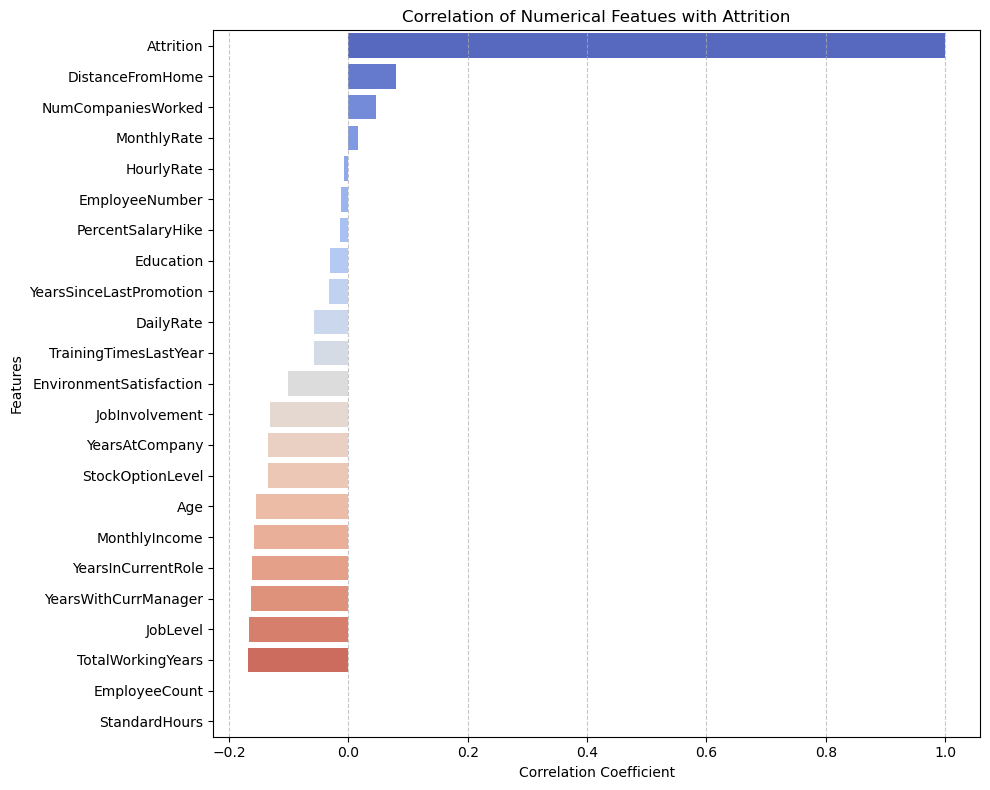

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\Cleaned_HR_Analytics.csv")

df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

num_cols=df.select_dtypes(include='number')

correlation_with_attrition=num_cols.corr()['Attrition'].sort_values(ascending=False)

print("Correlation of Numerical Features with Attrition:\n")
print(correlation_with_attrition)

plt.figure(figsize=(10,8))
sns.barplot(x=correlation_with_attrition.values,y=correlation_with_attrition.index,hue=correlation_with_attrition.index,palette='coolwarm',legend=False)
plt.title("Correlation of Numerical Featues with Attrition")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True,axis='x',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

## 📊 Correlation Analysis: Numerical Features vs Attrition

This analysis shows how strongly each numerical feature is correlated with Attrition (1 = Employee Left, 0 = Stayed). A **negative value** means the higher the feature, the **less likely the employee is to leave**. A **positive value** means the higher the feature, the **more likely the employee is to leave**.

| Feature                     | Correlation | Interpretation |
|-----------------------------|-------------|----------------|
| **TotalWorkingYears**       | **-0.168**  | Employees with more experience are **less likely to leave**. |
| **JobLevel**                | **-0.167**  | Higher job level = more likely to **stay**. |
| **YearsWithCurrManager**    | **-0.163**  | Longer time with manager = **less chance of attrition**. |
| **YearsInCurrentRole**      | **-0.161**  | More years in role = more likely to **stay**. |
| **MonthlyIncome**           | **-0.158**  | Higher salary = **lower attrition**. |
| **Age**                     | **-0.155**  | **Younger employees leave more** often. |
| **StockOptionLevel**        | **-0.135**  | Stock options reduce attrition. |
| **YearsAtCompany**          | **-0.135**  | Longer tenure = less likely to leave. |
| **JobInvolvement**          | **-0.131**  | Higher involvement = less likely to leave. |
| **EnvironmentSatisfaction** | **-0.102**  | Lower satisfaction may increase attrition slightly. |
| **TrainingTimesLastYear**   | -0.058      | Weak relationship. |
| **DailyRate**               | -0.057      | No clear pattern. |
| **YearsSinceLastPromotion** | -0.032      | Weak relationship. |
| **Education**               | -0.030      | Not meaningful. |
| **PercentSalaryHike**       | -0.015      | No real impact. |
| **EmployeeNumber**          | -0.012      | Just an ID. Irrelevant. |
| **HourlyRate**              | -0.008      | No correlation. |
| **MonthlyRate**             | +0.017      | No real relationship. |
| **NumCompaniesWorked**      | +0.045      | Slight, very weak. |
| **DistanceFromHome**        | +0.080      | Employees who live farther may leave slightly more, but weak. |
| **EmployeeCount** / **StandardHours** | NaN    | These have constant values, so they can't correlate with anything. |

---

### ✅ Key Takeaways:

- **Most important negative correlations**:  
  `TotalWorkingYears`, `JobLevel`, `YearsWithCurrManager`, `MonthlyIncome`, `Age`.

- These features help **predict lower attrition**.  
- Features with **weak or no correlation** aren't useful for attrition prediction.
